# Naive Bayes homework with Yelp review text

## Task 1

Read `yelp.csv` into a DataFrame.

In [1]:
# access yelp.csv in your data directory and load it into a DataFrame
import pandas as pd
path = '/Users/arthurkolios/documents/data_science/GA-SEA-DAT1/data/'
yelp = pd.read_csv(path + 'yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


## Task 2

Create a new DataFrame that only contains the 5-star and 1-star reviews.

In [2]:
# filter the DataFrame to only rows that have a 5-star or 1-star rating. Using an OR condition
yelp51 = yelp[(yelp.stars==1) | (yelp.stars==5)]

## Task 3

Split the new DataFrame into training and testing sets, using the review text as the only feature and the star rating as the response.

In [3]:
# define X and y
X = yelp51['text']
y = yelp51.stars

In [4]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Task 4

Use CountVectorizer to create document-term matrices from X_train and X_test.

In [5]:
# import and instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [6]:
# fit and transform X_train, but only transform X_test
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
print X_train_dtm

X_test_dtm = vect.transform(X_test)
print X_test_dtm

  (0, 16)	1
  (0, 301)	1
  (0, 670)	1
  (0, 723)	1
  (0, 798)	3
  (0, 997)	2
  (0, 1971)	2
  (0, 3625)	1
  (0, 4647)	5
  (0, 4699)	1
  (0, 4791)	1
  (0, 5282)	2
  (0, 5955)	1
  (0, 6081)	1
  (0, 6497)	1
  (0, 6800)	2
  (0, 6957)	2
  (0, 7555)	2
  (0, 7912)	1
  (0, 8317)	2
  (0, 8318)	2
  (0, 8613)	1
  (0, 9428)	1
  (0, 9783)	1
  (0, 10202)	1
  :	:
  (3063, 5017)	1
  (3063, 5577)	1
  (3063, 5757)	1
  (3063, 6403)	1
  (3063, 6504)	2
  (3063, 6623)	1
  (3063, 7895)	2
  (3063, 7912)	1
  (3063, 8717)	1
  (3063, 8925)	1
  (3063, 9783)	1
  (3063, 10128)	1
  (3063, 10202)	1
  (3063, 10274)	1
  (3063, 10389)	1
  (3063, 12509)	1
  (3063, 13412)	1
  (3063, 14021)	1
  (3063, 14450)	2
  (3063, 14858)	4
  (3063, 14865)	1
  (3063, 14913)	1
  (3063, 15716)	1
  (3063, 15843)	1
  (3063, 16063)	1
  (0, 16)	1
  (0, 869)	3
  (0, 1262)	1
  (0, 1554)	1
  (0, 3899)	1
  (0, 4763)	1
  (0, 5282)	2
  (0, 5429)	1
  (0, 6464)	1
  (0, 6678)	2
  (0, 7555)	1
  (0, 8129)	1
  (0, 8734)	1
  (0, 9428)	1
  (0, 10202)	1
  (

## Task 5

Use Naive Bayes to predict the star rating for reviews in the testing set, and calculate the accuracy.

In [7]:
# import/instantiate/fit
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [8]:
# make class predictions
y_pred_class = nb.predict(X_test_dtm)

In [9]:
# calculate accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.931506849315


## Task 6

Calculate the AUC.

In [10]:
# y_test contains fives and ones, which will confuse the roc_auc_score function
y_test[:10].values

array([1, 5, 5, 5, 1, 5, 5, 5, 5, 5])

In [13]:
# create y_test_binary, which contains ones and zeros instead
y_test_binary = y_test.map({5:1,1:0})
y_test_binary[:10].values

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [14]:
# predict class probabilities
nb.predict_proba(X_test_dtm)

y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([ 0.0398561,  0.9999238,  1.       , ...,  0.9999992,  1.       ,  1.       ])

In [15]:
# calculate the AUC using y_test_binary and y_pred_prob
from sklearn import metrics
print metrics.roc_auc_score(y_test_binary, y_pred_prob)

0.950356865942


## Task 7

Plot the ROC curve.

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

[ 0.          0.03351955  0.03351955  0.03351955  0.03910615  0.03910615
  0.03910615  0.03910615  0.03910615  0.03910615  0.03910615  0.03910615
  0.03910615  0.03910615  0.03910615  0.03910615  0.03910615  0.03910615
  0.03910615  0.03910615  0.03910615  0.03910615  0.03910615  0.03910615
  0.03910615  0.03910615  0.03910615  0.03910615  0.03910615  0.03910615
  0.03910615  0.03910615  0.03910615  0.03910615  0.04469274  0.04469274
  0.04469274  0.04469274  0.04469274  0.04469274  0.04469274  0.04469274
  0.04469274  0.04469274  0.04469274  0.04469274  0.05027933  0.05027933
  0.05027933  0.05027933  0.05027933  0.05027933  0.05027933  0.05027933
  0.05027933  0.05027933  0.05027933  0.05027933  0.05027933  0.05027933
  0.05027933  0.05027933  0.05027933  0.05027933  0.05027933  0.05027933
  0.05027933  0.05027933  0.05027933  0.05027933  0.05027933  0.05027933
  0.05027933  0.05027933  0.05027933  0.05027933  0.05027933  0.05027933
  0.05027933  0.05027933  0.05027933  0.05027933  0

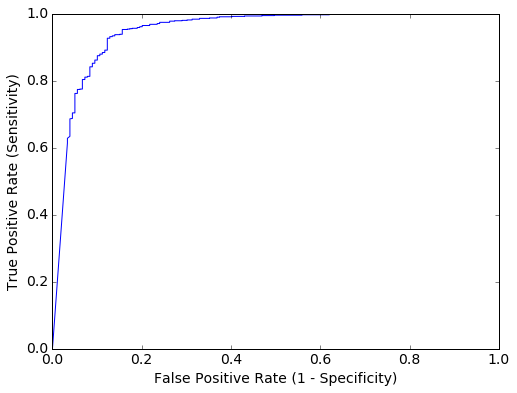

In [36]:
# plot ROC curve using y_test_binary and y_pred_prob
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

fpr, tpr, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
print fpr
#print(metrics.roc_curve(y_test_binary, y_pred_prob))

## Task 8

Print the confusion matrix, and calculate the sensitivity and specificity. Comment on the results.

In [37]:
# print the confusion matrix
y_test_binary
conf_mat =  metrics.confusion_matrix(y_test_binary, y_pred_class)
print conf_mat


[[  0 125  54]
 [  0  16 827]
 [  0   0   0]]
[ 0.          0.03351955  0.03351955  0.03351955  0.03910615  0.03910615
  0.03910615  0.03910615  0.03910615  0.03910615  0.03910615  0.03910615
  0.03910615  0.03910615  0.03910615  0.03910615  0.03910615  0.03910615
  0.03910615  0.03910615  0.03910615  0.03910615  0.03910615  0.03910615
  0.03910615  0.03910615  0.03910615  0.03910615  0.03910615  0.03910615
  0.03910615  0.03910615  0.03910615  0.03910615  0.04469274  0.04469274
  0.04469274  0.04469274  0.04469274  0.04469274  0.04469274  0.04469274
  0.04469274  0.04469274  0.04469274  0.04469274  0.05027933  0.05027933
  0.05027933  0.05027933  0.05027933  0.05027933  0.05027933  0.05027933
  0.05027933  0.05027933  0.05027933  0.05027933  0.05027933  0.05027933
  0.05027933  0.05027933  0.05027933  0.05027933  0.05027933  0.05027933
  0.05027933  0.05027933  0.05027933  0.05027933  0.05027933  0.05027933
  0.05027933  0.05027933  0.05027933  0.05027933  0.05027933  0.05027933
  0.0

In [33]:
# calculate sensitivity - True positive rate
sum1 = conf_mat[1].sum()
print sum1
tp = conf_mat[1][2]
print tp
sensitivity = tp/(sum1*1.0)
print sensitivity

843
827
0.981020166074


In [38]:
# calculate specificity (1 - False Positive Rate)
sum2 = conf_mat[0].sum()
fp = conf_mat[0][2]
fpr2 = fp/(sum2*1.0)
specificity = 1-fpr2
print specificity

0.698324022346


The model is having a much easier time detecting five-star reviews than one-star reviews.

## Task 9

Browse through the review text for some of the false positives and false negatives. Based on your knowledge of how Naive Bayes works, do you have any theories about why the model is incorrectly classifying these reviews?

In [21]:
# print message text for the false positives
pd.set_option('display.max_seq_items', 100)
print X_test[y_test < y_pred_class]

6820    There are few resources in Arizona for dancers...
9846    NO.  Don't go. Don't do it.  This was my first...
3647    I went in once looking for Canidae.  Which acc...
5121    Just isn't very good.\n\nI don't understand wh...
765     I am not a fan of this place. I like to try to...
7130    I was not impressed. The food was bad & expens...
3654    pretentious and bad service - attendants are t...
4227    I have literally never seen this place open an...
5882    Tried Shorty's today, sadly it will be my one ...
7188    Simply stated..............a GREASY burger fro...
7141    Let me first say that we are fans of the W Hot...
753     I went today to meet my daughter for lunch.  W...
289     I'd say I've been to the Clubhouse a few times...
4686                UPDATE: This location is closed. Boo!
7803    I'm sad to report that we dined here for lunch...
4249    AMC Theaters has the distinct disadvantage in ...
1608    The reviews were so good that my friend and I ...
8955    I woul

I think that words like "crave", "cool", "good", "enjoy", "rave" and "OMG" were associated in the training model with good reviews.

In [22]:
# print message text for the false negatives
X_test[y_test > y_pred_class]

2902    Southwest blows its competitors so far out of ...
6355                   Yeah, its BBB....what else to say?
9765    You can't give anything less than 5 stars to a...
3052    When I met some friends for dinner at this res...
696     This is the only auto repair place I've ever s...
8404    Bruce saved my day, my computer crashed this m...
9937    I know Kerrie through my networking and we ben...
7300    Decided to call CityWide based on positive onl...
357     Called these guys when an evap cooler water pr...
1404    Excellent customer service, super clean, and t...
9622    I always buy my tires at Walmart, but they did...
921     Just because i feel like doing something diffe...
2790    John did a fantastic job on figuring out my ov...
4938    DUDE..where is the manga....where are the card...
2504    I've passed by prestige nails in walmart 100s ...
402     Once again Wildflower proves why it's my favor...
Name: text, dtype: object

For the false negatives, it looks like, in some cases, words like "horribly", "terrible" and "hate" were associated with negative reviews in the training model.

## Task 10

Let's pretend that you want to balance sensitivity and specificity. You can achieve this by changing the threshold for predicting a 5-star review. What threshold approximately balances sensitivity and specificity?

In [67]:
# create a list that will store the results of the process below
# loop through the thresholds returned by the metrics.roc_curve function
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
#y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
tup = []
for index, values in enumerate(thresholds):
    sens = tpr[index]
    spec = (1-fpr[index])
    diff = sens - spec
    X = [values,(sens-spec)]
    tup.append(X)

tup2 = pd.DataFrame(tup, columns = (['thresholds','diff']))
print tup2.describe()

         thresholds        diff
count  4.260000e+02  426.000000
mean   7.517791e-01    0.079560
std    3.982111e-01    0.305886
min    1.942358e-34   -1.000000
25%    5.337807e-01   -0.155677
50%    9.983440e-01    0.012164
75%    9.999780e-01    0.275713
max    2.000000e+00    1.000000


In [90]:
# locate the minimum difference (at which sensitivity and specificity are balanced)
# pick rows>0
print tup2[tup2['diff']>0]


       thresholds      diff
206  9.985983e-01  0.002253
207  9.985761e-01  0.003439
208  9.985456e-01  0.004626
209  9.984385e-01  0.005812
210  9.984059e-01  0.006998
211  9.984008e-01  0.008184
212  9.983633e-01  0.009371
213  9.983247e-01  0.014957
214  9.982801e-01  0.016143
215  9.981286e-01  0.017330
216  9.980586e-01  0.018516
217  9.980081e-01  0.019702
218  9.979851e-01  0.020888
219  9.977156e-01  0.022075
220  9.975290e-01  0.023261
221  9.975280e-01  0.024447
222  9.972252e-01  0.025633
223  9.968247e-01  0.026820
224  9.966896e-01  0.028006
225  9.966687e-01  0.029192
226  9.960426e-01  0.030378
227  9.958523e-01  0.031565
228  9.957291e-01  0.032751
229  9.954480e-01  0.033937
230  9.953947e-01  0.035123
231  9.952793e-01  0.036310
232  9.948605e-01  0.037496
233  9.948268e-01  0.038682
234  9.945539e-01  0.039868
235  9.933298e-01  0.041054
..            ...       ...
396  7.740658e-05  0.636872
397  6.287978e-05  0.642458
398  5.336824e-05  0.648045
399  4.258053e-05  0

Sensitivity and specificity are balanced with threshold = 9.985983e-01 , with a sensitivity-specificity difference of 0.002253

## Task 11

Let's see how well Naive Bayes performs when all reviews are included, rather than just 1-star and 5-star reviews:

- Define X and y using the original DataFrame from step 1. (y should contain 5 different classes.)
- Split the data into training and testing sets.
- Calculate the testing accuracy of a Naive Bayes model.
- Compare the testing accuracy with the null accuracy.
- Print the confusion matrix.
- Comment on the results.

In [91]:
# define X and y using the original DataFrame
# define X and y
X = yelp['text']
y = yelp.stars

In [92]:
# split into training and testing sets

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [93]:
# create document-term matrices
# import and instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
# fit and transform X_train, but only transform X_test
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
print X_train_dtm

X_test_dtm = vect.transform(X_test)
print X_test_dtm

  (0, 898)	1
  (0, 1101)	1
  (0, 1120)	2
  (0, 1122)	2
  (0, 1262)	5
  (0, 1371)	1
  (0, 1392)	1
  (0, 2328)	2
  (0, 2341)	1
  (0, 2398)	1
  (0, 2642)	1
  (0, 2711)	1
  (0, 3105)	2
  (0, 3779)	1
  (0, 3785)	1
  (0, 3916)	1
  (0, 4307)	1
  (0, 4352)	2
  (0, 4454)	3
  (0, 4475)	1
  (0, 4995)	1
  (0, 5642)	1
  (0, 6218)	1
  (0, 7130)	1
  (0, 7607)	2
  :	:
  (7499, 21340)	1
  (7499, 21698)	1
  (7499, 21816)	1
  (7499, 22010)	1
  (7499, 22115)	2
  (7499, 22426)	1
  (7499, 22709)	1
  (7499, 22834)	11
  (7499, 22879)	1
  (7499, 22920)	2
  (7499, 22935)	1
  (7499, 23064)	1
  (7499, 23125)	2
  (7499, 23509)	1
  (7499, 24078)	1
  (7499, 24143)	1
  (7499, 24272)	1
  (7499, 24632)	1
  (7499, 24701)	3
  (7499, 24762)	2
  (7499, 24843)	2
  (7499, 24904)	1
  (7499, 24967)	1
  (7499, 25156)	1
  (7499, 25362)	1
  (0, 1064)	1
  (0, 1262)	5
  (0, 1951)	1
  (0, 2016)	1
  (0, 2373)	1
  (0, 2563)	1
  (0, 2702)	1
  (0, 3294)	1
  (0, 3779)	1
  (0, 4335)	1
  (0, 4425)	1
  (0, 4559)	1
  (0, 4680)	1
  (0, 5032)	

In [94]:
# fit a Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [95]:
# make class predictions
y_pred_class = nb.predict(X_test_dtm)

In [96]:
# calculate the testing accuary
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.4692


In [98]:
# calculate the null accuracy
print y_test.value_counts()
y_test.value_counts().head(1) / len(y_test)

4    832
5    819
3    396
2    248
1    205
Name: stars, dtype: int64


4    0.3328
Name: stars, dtype: float64

In [104]:
# print the confusion matrix
conf_mat=metrics.confusion_matrix(y_test, y_pred_class)
print conf_mat

In [106]:
 #calculate sensitivity - True positive rate (for 1 star reviews)
sum1 = conf_mat[0].sum()
tp = conf_mat[0][0]
sensitivity = tp/(sum1*1.0)
print 'sensitivity =' + str(sensitivity)


sensitivity =0.273170731707


In [107]:
# calculate specificity (1 - False Positive Rate)
sum2 = conf_mat[0].sum()
fp = conf_mat[0][2]
fpr2 = fp/(sum2*1.0)
specificity = 1-fpr2
print 'specificity = ' + str(specificity)

specificity = 0.90243902439


Comments: This model has a far lower accuracy rate (0.47) than the previous model (0.93). The problems seem to lie on the sensitivity side, with a very low true positive rate of 0.27. It does much better on the specificity side, with a specificity level of 0.902.

